<p></p><img src="https://i.pinimg.com/originals/59/8e/c4/598ec42e15c85716c6954c26840d4f4b.jpg" style="width: 100px"/>
<a href="https://github.com/sqrt495?tab=repositories" target="_parent">
    <h4><center><font color=black>Open In GitHub</font></center></h4></a>
<p></p>

В отличие от
Theano, Caffe и TensorFlow, **PyTorch** реализует метод автоматического дифференцирования на основе так называемой ленты [`tape`](http://bit.ly/2Jrntq1), с помощью
которого можно описывать и выполнять графы вычислений динамически, что
очень удобно для отладки и конструирования сложных моделей с минимальными
усилиями.

<h3><center>ДИНАМИЧЕСКИЕ И СТАТИЧЕСКИЕ ГРАФЫ ВЫЧИСЛЕНИЙ</center></h3>

*Такие статические фреймворки, как **Theano, Caffe и TensorFlow**, требуют описания
и компиляции графа вычислений перед его выполнением. Хотя это приводит к очень
высокой производительности реализаций (что полезно в промышленной эксплуатации), но может доставить немало хлопот при исследовательской работе и во время
разработки.*


*Современные фреймворки, такие как **Chainer, DyNet и PyTorch***, реализуют динамические графы вычислений, не требующие компиляции моделей перед
каждым выполнением, что обеспечивает возможность более гибкого, императивного
стиля разработки. Динамические графы вычислений особенно удобны при моделировании задач NLP, в которых различные входные данные могут привести к разным
структурам графа.*

PyTorch — оптимизированная библиотека для работы с тензорами, включающая
набор пакетов для глубокого обучения. Основное понятие этой библиотеки — тензор (`tensor`), математический объект для хранения многомерных данных.

* Тензор ранга 0 — просто число, или скаляр.
* Тензор ранга 1 — массив чисел (то есть вектор).
* Тензор ранга 2 представляет собой массив векторов (матрицу).

<p></p><img src="https://dpzbhybb2pdcj.cloudfront.net/stevens2/v-10/Figures/p1ch3_tensors.png" style="width: 900px"/>
<a href="https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-3/v-10/12" target="_parent">
    <h4><center><font color=black>Deep Learning with PyTorch</font></center></h4></a>
<p></p>




## <center>[Run official tutorial!](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)</center>

In [20]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [21]:
x = torch.empty(5, 3)
x, type(x)

(tensor([[1.0194e-38, 9.6429e-39, 9.2755e-39],
         [9.1837e-39, 9.3674e-39, 1.0745e-38],
         [1.0653e-38, 9.5510e-39, 1.0561e-38],
         [1.0194e-38, 1.1112e-38, 1.0561e-38],
         [9.9184e-39, 1.0653e-38, 4.1327e-39]]), torch.Tensor)

In [22]:
y = torch.rand(5, 3)
y

tensor([[0.7639, 0.6921, 0.8302],
        [0.0788, 0.8946, 0.4697],
        [0.8550, 0.9359, 0.8018],
        [0.7076, 0.9006, 0.8673],
        [0.4900, 0.8893, 0.8960]])

In [23]:
indices = torch.LongTensor([0, 2])

In [24]:
# непоследовательная выборка из тензора

torch.index_select?

In [25]:
torch.index_select(x, dim=1, index=indices)

tensor([[1.0194e-38, 9.2755e-39],
        [9.1837e-39, 1.0745e-38],
        [1.0653e-38, 1.0561e-38],
        [1.0194e-38, 1.0561e-38],
        [9.9184e-39, 4.1327e-39]])

Обратите внимание, что тип индексов — LongTensor; таковы требования к доступу
по индексу при использовании функций PyTorch. Можно также выполнять объединение тензоров с помощью встроенных функций конкатенации, указывая тензоры и нужные измерения.

In [26]:
# `+`

z = torch.add(x, y)
z

tensor([[0.7639, 0.6921, 0.8302],
        [0.0788, 0.8946, 0.4697],
        [0.8550, 0.9359, 0.8018],
        [0.7076, 0.9006, 0.8673],
        [0.4900, 0.8893, 0.8960]])

In [27]:
# concat

torch.cat([y, z], dim=0)

tensor([[0.7639, 0.6921, 0.8302],
        [0.0788, 0.8946, 0.4697],
        [0.8550, 0.9359, 0.8018],
        [0.7076, 0.9006, 0.8673],
        [0.4900, 0.8893, 0.8960],
        [0.7639, 0.6921, 0.8302],
        [0.0788, 0.8946, 0.4697],
        [0.8550, 0.9359, 0.8018],
        [0.7076, 0.9006, 0.8673],
        [0.4900, 0.8893, 0.8960]])

Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

In [28]:
z.t_()
z

tensor([[0.7639, 0.0788, 0.8550, 0.7076, 0.4900],
        [0.6921, 0.8946, 0.9359, 0.9006, 0.8893],
        [0.8302, 0.4697, 0.8018, 0.8673, 0.8960]])

In [29]:
z.size()

torch.Size([3, 5])

In [30]:
z[:, -1]

tensor([0.4900, 0.8893, 0.8960])

**Resizing**: If you want to resize/reshape tensor, you can use `torch.view`:

In [31]:
a = torch.randn(4, 4)
b = a.view(16)
c = a.view(-1, 8)  # the size -1 is inferred from other dimensions
print(a.size(), b.size(), c.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [32]:
a,b,c

(tensor([[ 0.4881, -0.6317,  0.9597,  1.2457],
         [ 1.5078, -0.9628,  0.0953, -0.6028],
         [-0.2485,  0.2688, -1.3205,  0.0413],
         [ 0.2237, -0.2122, -0.2026,  1.1516]]),
 tensor([ 0.4881, -0.6317,  0.9597,  1.2457,  1.5078, -0.9628,  0.0953, -0.6028,
         -0.2485,  0.2688, -1.3205,  0.0413,  0.2237, -0.2122, -0.2026,  1.1516]),
 tensor([[ 0.4881, -0.6317,  0.9597,  1.2457,  1.5078, -0.9628,  0.0953, -0.6028],
         [-0.2485,  0.2688, -1.3205,  0.0413,  0.2237, -0.2122, -0.2026,  1.1516]]))

In [33]:
a[2,3].item(), type(a[2,3].item())

(0.04133037477731705, float)

In [34]:
a = torch.rand(3, 3)

# добавьте в него новое измерение размером 1
b = a.unsqueeze(0)

# удалить измерение
c = b.squeeze(0)

a, b, c

(tensor([[0.4605, 0.2636, 0.1207],
         [0.2765, 0.5210, 0.7984],
         [0.0901, 0.3409, 0.1167]]), tensor([[[0.4605, 0.2636, 0.1207],
          [0.2765, 0.5210, 0.7984],
          [0.0901, 0.3409, 0.1167]]]), tensor([[0.4605, 0.2636, 0.1207],
         [0.2765, 0.5210, 0.7984],
         [0.0901, 0.3409, 0.1167]]))

Пакетное произведение двух трехмерных матриц `A2=torch.rand(3,4,5)` и `B2=torch.rand(3,5,4))`

In [35]:
A2 = torch.rand(3, 4, 5)
B2 = torch.rand(3, 5, 4)
torch.bmm(A2, B2)

tensor([[[1.0119, 1.1505, 1.0143, 1.4984],
         [1.5249, 1.3300, 1.6218, 1.9445],
         [1.4443, 0.9338, 1.4907, 1.7936],
         [0.8247, 0.6208, 0.7870, 1.2722]],

        [[0.6775, 0.5240, 0.8258, 1.1253],
         [1.1274, 1.2248, 0.9387, 1.7912],
         [1.1123, 1.2278, 1.2266, 2.0158],
         [1.2720, 1.1341, 0.6198, 1.2739]],

        [[1.6329, 0.9381, 0.9213, 0.9097],
         [1.3581, 0.8044, 1.0222, 0.7999],
         [1.5646, 0.8983, 1.1826, 0.8216],
         [1.4814, 0.6591, 0.8312, 0.7530]]])

Пакетное произведение трехмерной и двумерной матриц

In [36]:
B3 = torch.rand(5, 4)
torch.bmm(A2, B3.unsqueeze(0).expand(A2.size(0), *B3.size()))

tensor([[[0.6797, 0.8483, 1.3039, 0.6993],
         [1.2568, 1.0764, 1.5570, 1.1395],
         [1.0965, 1.1881, 1.7671, 1.2077],
         [0.4635, 0.5733, 1.1338, 0.6418]],

        [[0.6874, 0.6324, 1.4293, 0.8585],
         [1.7335, 1.2520, 1.1749, 1.1631],
         [1.5763, 1.3337, 1.7259, 1.3174],
         [1.1193, 1.2839, 1.1505, 0.7893]],

        [[1.0019, 0.7535, 1.2921, 0.7641],
         [1.0729, 0.9044, 1.1684, 0.8804],
         [1.1504, 1.0619, 1.6421, 1.1715],
         [1.3611, 1.0130, 1.3379, 1.1430]]])

### CUDA

До сих пор наши тензоры располагались в памяти CPU. При выполнении операций линейной алгебры имеет смысл воспользоваться GPU, если в вашей системе
он есть. Для применения GPU необходимо сначала выделить под тензор место
в памяти GPU. Доступ к GPU производится с помощью специализированного
API — CUDA. **API CUDA был создан компанией NVIDIA**, его можно использо-
Тензоры CUDA вать только для GPU производства NVIDIA.
.

В PyTorch есть объекты-тензоры
для CUDA, неотличимые на практике от обычных CPU-тензоров, за исключением
внутреннего механизма выделения памяти.
PyTorch обеспечивает простоту создания этих CUDA-тензоров, поддерживая
перемещение тензоров с CPU на GPU с сохранением их базового типа. В PyTorch
рекомендуется применять аппаратно независимый подход и писать код, который бы
работал как на CPU, так и на GPU.


Проверяем, доступен ли GPU, с помощью функции `torch.cuda.is_available()` и извлекаем название
устройства, вызвав метод `torch.device()`. Далее мы создаем все будущие тензоры
и перемещаем их на нужное устройство с помощью метода `.to(device)`.

In [37]:
torch.cuda.is_available()

False

### [AUTOGRAD](https://pytorch.org/docs/stable/autograd.html#module-torch.autograd)


``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

In [49]:
# Create a 2x2 tensor with gradient-accumulation capabilities
H = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(H)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [51]:
# Do an operation on the tensor:


# Deduct 2 from all elements
yH = H - 2
print(yH)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


**`yH` was created as a result of an operation, so it has a `grad_fn`.**

In [57]:
print(yH.grad_fn)

In [58]:
# What's happening here?
print(H.grad_fn)

None


In [59]:
# Let's dig further...
yH.grad_fn.next_functions[0][0]

In [60]:
yH.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [61]:
# Do more operations on y
zH = yH * yH * 3
aH = zH.mean()  # average

print(zH)
print(aH)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


Visualise the computational graph! [(thks @szagoruyko)](https://github.com/szagoruyko/pytorchviz)

In [67]:
import os
import sys
sys.path.insert(0, os.path.abspath('C:/Users/Asus/GitHab_repos/lections/MAIN HELPER/easy_lections/ML_complex/pytorchviz-master/torchviz'))
import dot

<center><h3>/\ some help topics for import /\</h3></center>

[Manipulating sys.path in the Notebook](https://mg.readthedocs.io/importing-local-python-modules-from-jupyter-notebooks/sys-path-in-notebook/path-notebook.html) or [Import py file in another directory in Jupyter notebook](https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook)

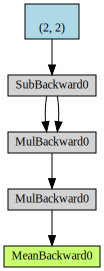

In [69]:
from dot import make_dot, make_dot_from_trace

make_dot(aH)

Create a tensor and set `requires_grad=True` to track computation with it

In [38]:
y = torch.rand(5, 3, requires_grad=True)
y

tensor([[0.4799, 0.1197, 0.1643],
        [0.6158, 0.8919, 0.0246],
        [0.2482, 0.4007, 0.8596],
        [0.5937, 0.6129, 0.8028],
        [0.0041, 0.2728, 0.1618]], requires_grad=True)

In [39]:
torch.add(z.t_(), y)
y

tensor([[0.4799, 0.1197, 0.1643],
        [0.6158, 0.8919, 0.0246],
        [0.2482, 0.4007, 0.8596],
        [0.5937, 0.6129, 0.8028],
        [0.0041, 0.2728, 0.1618]], requires_grad=True)

In [40]:
y = y+8
y

tensor([[8.4799, 8.1197, 8.1643],
        [8.6158, 8.8919, 8.0246],
        [8.2482, 8.4007, 8.8596],
        [8.5937, 8.6129, 8.8028],
        [8.0041, 8.2728, 8.1618]], grad_fn=<AddBackward0>)

Когда тензор создается с параметром `requires_grad=True`, тем самым от PyTorch
требуется хранить вспомогательную информацию, необходимую для вычисления
градиентов. Во-первых, PyTorch будет отслеживать значения, получаемые при
прямом проходе.


Затем, в конце вычислений, для определения обратного шага
используется одно скалярное значение. Обратный шаг запускается путем вызова
метода `backward()` для тензора, полученного в результате вычисления функции
потерь. При обратном шаге вычисляется значение градиента для объекта-тензора,
участвовавшего в прямом шаге.


В целом градиент представляет собой значение, отражающее угол наклона выходного значения функции по отношению к ее входному значению. В сфере
графов вычислений градиенты существуют для всех параметров модели, их
можно считать вкладом каждого параметра в сигнал рассогласования. В PyTorch
получить доступ к градиентам узлов графа вычислений можно с помощью переменной экземпляра `.grad`. Она используется при оптимизации для обновления
значений параметров.

In [41]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

y

tensor([ 336.6070, -935.9929, -468.6307], grad_fn=<MulBackward0>)

Now in this case `y` is no longer a scalar. `torch.autograd` could not compute the full Jacobian directly, but if we just want the [vector-Jacobian](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%AF%D0%BA%D0%BE%D0%B1%D0%B8) product, simply pass the vector to backward as argument:

In [42]:
v = torch.tensor([0.5, 1.0, 0.5], dtype=torch.float)
y.backward(v)

x.grad

tensor([256., 512., 256.])

## [Autograd functions](https://pytorch.org/docs/stable/autograd.html#tensor-autograd-functions)

Neural networks can be constructed using the `torch.nn` package.

A typical training procedure for a neural network is as follows:

1. Define the neural network that has some learnable parameters (or weights)
2. Iterate over a dataset of inputs
3. Process input through the network
4. Compute the loss (how far is the output from being correct)
5. Propagate gradients back into the network’s parameters
6. Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.

In [43]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
params = list(net.parameters())
print(len(params))
for _ in params:
    print(_.size())

10
torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 576])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [45]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1354, -0.0072,  0.1608,  0.0603, -0.0439,  0.1093,  0.0255,  0.0751,
          0.0338, -0.0374]], grad_fn=<AddmmBackward>)


In [46]:
net.zero_grad()
out.backward(torch.randn(1, 10))

``torch.nn`` only supports mini-batches. The entire ``torch.nn``
package only supports inputs that are a mini-batch of samples, and not
a single sample.

For example, ``nn.Conv2d`` will take in a 4D Tensor of
``nSamples x nChannels x Height x Width``.

If you have a single sample, just use ``input.unsqueeze(0)`` to add
a fake batch dimension.

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

Loss Function
-------------
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
[`loss functions`](https://pytorch.org/docs/nn.html#loss-functions) under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

In [47]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6874, grad_fn=<MseLossBackward>)


So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [48]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Функции активации

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


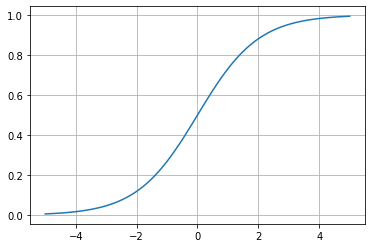

In [23]:
x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
ax = plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


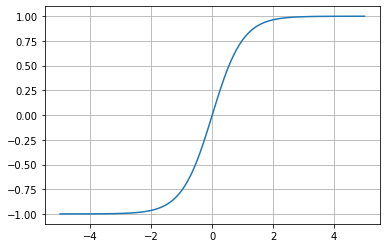

In [24]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


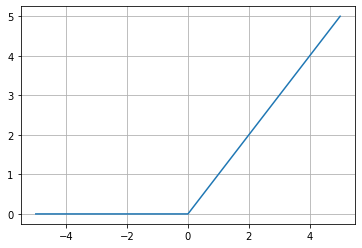

In [26]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

## <center> Регуляризация </center>

Одно из важнейших понятий глубокого обучения (и машинного обучения вообще) — **регуляризация (regularization)**. Истоки понятия регуляризации лежат
в теории численной оптимизации. Как вы помните, большинство алгоритмов
машинного обучения оптимизируют функцию потерь для поиска наиболее вероятных значений параметров (или «модели»), объясняющих наблюдаемые значения,
то есть минимизирующих потери. Для большинства наборов данных и задач существует несколько решений (возможных моделей) задачи оптимизации. Так какое
из них нам (или оптимизатору) выбрать?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1024px-Regularization.svg.png" style="width: 400px"/>

Обе кривые подходят для указанных точек, но какая из них менее вероятна?
Обращаясь к бритве Оккама, мы интуитивно понимаем, что простое объяснение
лучше сложного. Подобное ограничение гладкости в машинном обучении называется **L2-регуляризацией**. Управлять ею в PyTorch можно с помощью параметра `weight_decay` оптимизатора. Чем больше значение параметра `weight_decay`, тем
вероятнее выбор оптимизатором более гладкого (smoother) обоснования (то есть
тем сильнее L2-регуляризация).


Кроме L2-регуляризации, часто используется и **L1-регуляризация**, обычно для того,
чтобы подтолкнуть алгоритм к более разреженным решениям, то есть таким, в которых большинство параметров модели близки к нулю.

<p></p><img src="https://msdn.microsoft.com/en-us/dn904675.McCaffreyTRun_Figure%203%20vertical_hires(en-us,MSDN.10).png" style="width: 500px"/>


<a href="https://docs.microsoft.com/en-us/archive/msdn-magazine/2015/february/test-run-l1-and-l2-regularization-for-machine-learning#understanding-regularization" target="_parent">
    <h4><center><font color=black>Understanding Regularization</font></center></h4></a>

[Example Notebook with LinearSVC model](https://github.com/buomsoo-kim/Machine-learning-toolkits-with-python/blob/master/Regularization%20and%20feature%20selection%20(L1%20vs%20L2%20regularization)/source%20code/L1-and-L2-regularization.ipynb)

## Built a Net

In [2]:
W_df = pd.read_csv('W_df.csv') 
W_df = W_df.set_index('npi')
W_df.head(2)

,specialty,brand_name_rx_count,generic_rx_count,years_practicing,urban,bn_rx_proportion,drugs_variety,Midwest,Northeast,South,...,Infectious,Rheumatology,Cardiology,Psychiatry,Oncology,Nephrology,Pulmonology,Geriatric,Technology,male
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,Nephrology,384,2287,7,0,0.167906,68,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1992715205,General Practice,0,103,7,0,0.000000,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X_w = W_df.iloc[:30000,1:-1]
y_w = W_df.iloc[:30000,-1]

In [4]:
X_w.shape, y_w.shape

((30000, 31), (30000,))

In [6]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.20, stratify=y_w)

In [7]:
X_w_train = X_w_train.to_numpy()
y_w_train = y_w_train.to_numpy()

In [9]:
n_input = X_w.shape[1] # Number of inputs

# Layer size
n_hidden = 8 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

далее определяем функции передачи данных между слоями:

* [` nn.Linear()`](https://pytorch.org/docs/stable/nn.html#linear)
* [`nn.ELU()`](https://pytorch.org/docs/stable/nn.html#elu)
* [`nn.Sigmoid()`](https://pytorch.org/docs/stable/nn.html#sigmoid)

In [10]:
# Build network
clf_NN = nn.Sequential(
    nn.Linear(n_input, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(clf_NN)

Sequential(
  (0): Linear(in_features=31, out_features=8, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)


Определим функцию потерь [`nn.BCELoss()`](https://pytorch.org/docs/stable/nn.html#bceloss), размер шага и алгоритм оптимизации — берем [Adam](https://arxiv.org/abs/1412.6980), можно пробовать другие варианты, уже реализованные в [pytorch](https://pytorch.org/docs/stable/optim.html#algorithms).

In [11]:
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(clf_NN.parameters(), lr=learning_rate)

In [12]:
def run_clf_NN(X, y, clf_NN=clf_NN, epochs=500, loss_func=loss_func, lr=learning_rate, optimizer=optimizer):

    loss_list = []
    accuracy_list = []
    y_pred_list = []
    
    y_t = torch.FloatTensor(y).reshape(-1, 1)

    for e in range(epochs):
        X_t = torch.FloatTensor(X)
        y_hat = clf_NN(X_t)
        loss = loss_func(y_hat, y_t)

        # вычисляет значение ошибки/отклонения    
        loss.backward()
        # далее функци optimizer.step() обновляет веса опираясь на выявленную ошибку  
        optimizer.step()
        optimizer.zero_grad()
        y_hat_class = np.where(y_hat.detach().numpy()<0.5, 0, 1)
        accuracy = np.sum(y_w_train.reshape(-1,1)==y_hat_class) / len(y_w_train)
        
        # накапливаем данные    
        y_pred_list.append(y_hat_class)
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())
        
        
    return y_pred_list, accuracy_list, loss_list

In [13]:
def plot_NN_study(plot_name, loss_list, accuracy_list):
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    ax[0].plot(loss_list)
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Accuracy through the epochs')

    ax[1].plot(accuracy_list)
    ax[1].set_ylabel('Classification Accuracy')
    ax[1].set_title('Accuracy through the epochs')
    plt.tight_layout()
    
    plt.savefig(f'{plot_name}.tiff', transparent=False, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

In [14]:
y_pred_list, accuracy_list, loss_list = run_clf_NN(X_w_train, y_w_train, epochs=800)

In [15]:
len(y_pred_list[-1])

24000

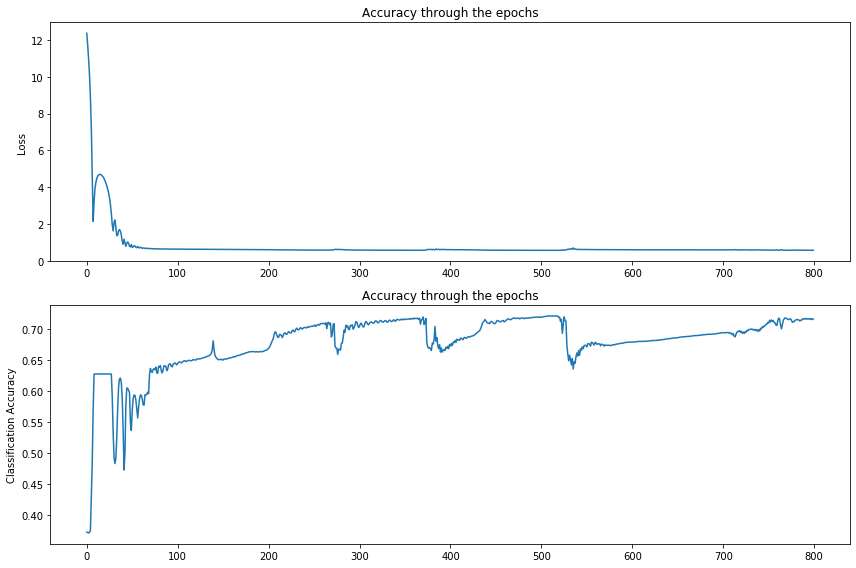

In [16]:
plot_NN_study('study_clf_NN', loss_list, accuracy_list)

In [19]:
accuracy_list[-30:]

[0.7172083333333333,
 0.7162916666666667,
 0.7156666666666667,
 0.7169166666666666,
 0.7170416666666667,
 0.7150416666666667,
 0.7115,
 0.7125833333333333,
 0.7124583333333333,
 0.7147083333333333,
 0.7153333333333334,
 0.7162083333333333,
 0.7155,
 0.7154583333333333,
 0.7138333333333333,
 0.714875,
 0.7143333333333334,
 0.7167916666666667,
 0.7164583333333333,
 0.7174583333333333,
 0.7166666666666667,
 0.71775,
 0.7165833333333333,
 0.717375,
 0.716625,
 0.7175416666666666,
 0.7159166666666666,
 0.717375,
 0.7160416666666667,
 0.7169166666666666]